# Pt I
## Analyze and modify Data to suit our needs

In [15]:
import pandas as pd
#convert data into a df
df= pd.read_json("/kaggle/input/nb-data/cs39aa_project-main/NLPCSS-20-main/data/data.json")
df.head()

,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
0,Fox News,"Trump blasts Howard Schultz, says ex-Starbucks...",0,bias,bias,From the Right,Obama administration alum Roger Fisk and Repub...,"{'time': '2019-01-28 16:10:44.680484', 'topics..."
1,USA TODAY,Trump blasts former Starbucks CEO Howard Schul...,0,bias,neutral,From the Center,WASHINGTON – President Donald Trump took a swi...,"{'time': 'None', 'topics': 'Election: Presiden..."
2,Washington Times,Mick Mulvaney: Trump to secure border 'with or...,0,bias,neutral,From the Right,Acting White House chief of staff Mick Mulvane...,"{'time': 'None', 'topics': 'White House', 'aut..."
3,Washington Times,Trump says 'we'll do the emergency' if border ...,0,bias,neutral,From the Right,President Trump repeated his vow Friday to dec...,"{'time': 'None', 'topics': 'White House, Polit..."
4,BBC News,Trump backs down to end painful shutdown tempo...,0,bias,neutral,From the Center,President Donald Trump has yielded to politica...,"{'time': '2019-01-26 00:00:00', 'topics': 'Whi..."


Explore df w/ pandas, as well as modify the data set

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7775 entries, 0 to 7774
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              7775 non-null   object
 1   title               7775 non-null   object
 2   event_id            7775 non-null   int64 
 3   adfontes_fair       7775 non-null   object
 4   adfontes_political  7775 non-null   object
 5   allsides_bias       7775 non-null   object
 6   content             7775 non-null   object
 7   misc                7775 non-null   object
dtypes: int64(1), object(7)
memory usage: 486.1+ KB
None


We'll only want to use allsides bias and content

In [17]:
df.drop(columns=['source','title','event_id','adfontes_fair','adfontes_political','misc'], inplace=True)
df.head()

,allsides_bias,content
0,From the Right,Obama administration alum Roger Fisk and Repub...
1,From the Center,WASHINGTON – President Donald Trump took a swi...
2,From the Right,Acting White House chief of staff Mick Mulvane...
3,From the Right,President Trump repeated his vow Friday to dec...
4,From the Center,President Donald Trump has yielded to politica...


In [18]:
#check for null entries
null_entries= df.isnull().sum()
print(null_entries, "\n")
#no null entries
df.info

allsides_bias    0
content          0
dtype: int64 



<bound method DataFrame.info of         allsides_bias                                            content
0      From the Right  Obama administration alum Roger Fisk and Repub...
1     From the Center  WASHINGTON – President Donald Trump took a swi...
2      From the Right  Acting White House chief of staff Mick Mulvane...
3      From the Right  President Trump repeated his vow Friday to dec...
4     From the Center  President Donald Trump has yielded to politica...
...               ...                                                ...
7770    From the Left  TAMPA, Fla. — Ann Romney will take to the podi...
7771   From the Right  She is a gracious warrior with a kind face, a ...
7772   From the Right  Republican VP pick on 'Special Report'\nMaking...
7773    From the Left  Paul Ryan said Monday he expects Ron Paul supp...
7774    From the Left  Tampa, Florida (CNN) \- As Rep. Ron Paul's thi...

[7775 rows x 2 columns]>

In [19]:
#analyze the data with pandas
print("The shape of the datafram is: ", df.shape ,"\n")
print("The unique vals for allsides bias is: \n", df.allsides_bias.unique(),"\n")
print("the value counts of the unique values is:")
df.allsides_bias.value_counts(normalize=True)

The shape of the datafram is:  (7775, 2) 

The unique vals for allsides bias is: 
 ['From the Right' 'From the Center' 'From the Left'] 

the value counts of the unique values is:


From the Left      0.473826
From the Right     0.366688
From the Center    0.159486
Name: allsides_bias, dtype: float64

## Tokenize df and Create Splits

tokenize the dataset

In [20]:
#import libs to tokenize df
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Tokenize df
df['tokens_raw']= df['content'].apply(word_tokenize)
df.head()

,allsides_bias,content,tokens_raw
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, and..."
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took..."
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, of, staff, Mick,..."
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, his, vow, Friday,..."
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, has, yielded, to, p..."


Get rid of stopwords

In [23]:
stops= set(stopwords.words('english'))
chars2remove= set(['.','!','/','?'])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if w not in stops])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if not re.match('^#',w)])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if not re.match('^http',w)])
df['tokens_raw']= df['tokens_raw'].apply(lambda x: [w for w in x if not re.match('@',w)])
df.head()

,allsides_bias,content,tokens_raw
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep..."
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took..."
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul..."
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl..."
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,..."


sort data by allsides_bias

In [24]:
#subset data by Right, Center, and Left leaning 
#Credit: nb_C_airline_tweets_take2.ipynb
df_right= df[df['allsides_bias'] == 'From the Right']
df_center= df[df['allsides_bias'] == 'From the Center']
df_left= df[df['allsides_bias'] == 'From the Left']

print("The shape of right leaning df: ", df_right.shape)
print("The shape of center leaning df: ", df_center.shape)
print("The shape of left leaning df: ", df_left.shape)

The shape of right leaning df:  (2851, 3)
The shape of center leaning df:  (1240, 3)
The shape of left leaning df:  (3684, 3)


lemmatize the tokens

In [26]:
#import libraries we will need to use
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

#create tokens from raw tokens, append tokens to dataframe
lemmatizer= WordNetLemmatizer()
df['tokens']= df['tokens_raw'].apply(lambda x: [lemmatizer.lemmatize(w, pos="v") for w in x])
df.head()

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


,allsides_bias,content,tokens_raw,tokens
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep...","[Obama, administration, alum, Roger, Fisk, Rep..."
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took...","[WASHINGTON, –, President, Donald, Trump, take..."
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul...","[Acting, White, House, chief, staff, Mick, Mul..."
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl...","[President, Trump, repeat, vow, Friday, declar..."
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,...","[President, Donald, Trump, yield, political, p..."


make class index for df

In [27]:
classes= df.allsides_bias.unique().tolist()
class_tok2idx= dict((v,k) for k, v in enumerate(classes))
class_idx2tok= dict((k,v) for k, v in enumerate(classes))
print(class_tok2idx)
print(class_idx2tok)
df['label']= df['allsides_bias'].apply(lambda x: class_tok2idx[x])
df.head()

{'From the Right': 0, 'From the Center': 1, 'From the Left': 2}
{0: 'From the Right', 1: 'From the Center', 2: 'From the Left'}


,allsides_bias,content,tokens_raw,tokens,label
0,From the Right,Obama administration alum Roger Fisk and Repub...,"[Obama, administration, alum, Roger, Fisk, Rep...","[Obama, administration, alum, Roger, Fisk, Rep...",0
1,From the Center,WASHINGTON – President Donald Trump took a swi...,"[WASHINGTON, –, President, Donald, Trump, took...","[WASHINGTON, –, President, Donald, Trump, take...",1
2,From the Right,Acting White House chief of staff Mick Mulvane...,"[Acting, White, House, chief, staff, Mick, Mul...","[Acting, White, House, chief, staff, Mick, Mul...",0
3,From the Right,President Trump repeated his vow Friday to dec...,"[President, Trump, repeated, vow, Friday, decl...","[President, Trump, repeat, vow, Friday, declar...",0
4,From the Center,President Donald Trump has yielded to politica...,"[President, Donald, Trump, yielded, political,...","[President, Donald, Trump, yield, political, p...",1


Make 80-20 split

In [28]:
import random
random.seed(42)

df= df.copy()
assert df.shape[0] == 7775

indices= list(range(df.shape[0]))

random.shuffle(indices)

train_indices= indices[:6220]
test_indices= indices[6220:]

df_train= df.iloc[train_indices,:].copy()
print(f"df_train.shape: {df_train.shape}")

df_test= df.iloc[test_indices,:].copy()
print(f"df_test.shape: {df_test.shape}")
df_test.head()

df_train.shape: (6220, 5)
df_test.shape: (1555, 5)


,allsides_bias,content,tokens_raw,tokens,label
2886,From the Right,The speech will mark the beginning of Trump’s ...,"[The, speech, mark, beginning, Trump, ’, tour,...","[The, speech, mark, begin, Trump, ’, tour, acr...",0
4973,From the Right,MILAN (AP) — An Italian coast guard ship heade...,"[MILAN, (, AP, ), —, An, Italian, coast, guard...","[MILAN, (, AP, ), —, An, Italian, coast, guard...",0
7481,From the Right,After a long struggle with medical and legal p...,"[After, long, struggle, medical, legal, proble...","[After, long, struggle, medical, legal, proble...",0
2344,From the Left,When Republicans rolled out their tax reform p...,"[When, Republicans, rolled, tax, reform, propo...","[When, Republicans, roll, tax, reform, proposa...",2
4069,From the Right,Campaigns team up to target upcoming primary s...,"[Campaigns, team, target, upcoming, primary, s...","[Campaigns, team, target, upcoming, primary, s...",0


## Explore the Dataset
we will use  Named Entity Recognition to observe most used entity types
#load libraries that will be used to explore data
import seaborn as sns
import spacy
from collections import Counter
nlp= spacy.load("en_core_web_sm")

In [29]:
#load libraries that will be used to explore data
import seaborn as sns
import spacy
from collections import Counter
nlp= spacy.load("en_core_web_sm")

In [30]:
#Create a method for spacy tokenization as well as plotting entity types
def plot_named_entity_barchart(text):
    #method for spacy tokenization
    def ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]

    #tokenize df content column
    ent= text.apply(lambda x: ner(x))
    ent= [x for sub in ent for x in sub]   

    #plot the entity data
    counter= Counter(ent)
    count= counter.most_common()
    x,y= map(list, zip(*count))
    sns.barplot(x=y, y=x)

#Credit: neptune.ai 6.0-named_entity_barchart

Plot name entities for all, left, center, and right content

most used entities in entire dataset:


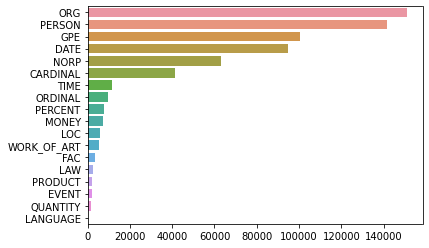

In [31]:
print("most used entities in entire dataset:")
plot_named_entity_barchart(df['content'])


most used entities in right leaning dataset:


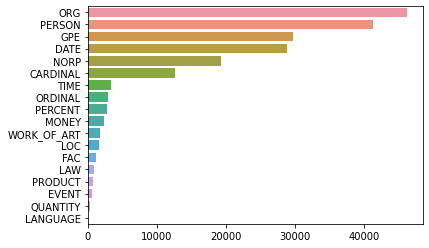

In [33]:
print("\nmost used entities in right leaning dataset:")
plot_named_entity_barchart(df_right['content'])


most used entities in centered dataset:


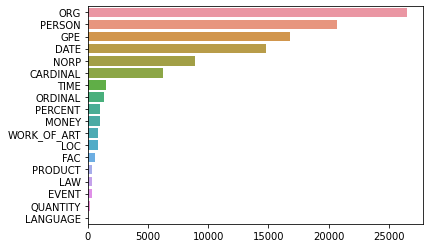

In [34]:
print("\nmost used entities in centered dataset:")
plot_named_entity_barchart(df_center['content'])


most used entities in left leaning dataset:


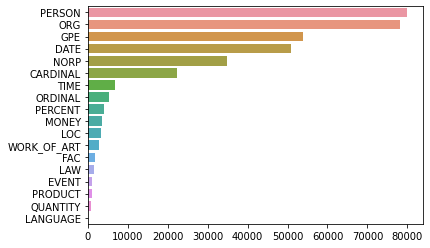

In [35]:
print("\nmost used entities in left leaning dataset:")
plot_named_entity_barchart(df_left['content'])

Lets see the most common tokens of the entire dataset as well as the right, center, and left

In [42]:
#Credit: 6.1-most_common_named_entity_barchart
#method to print out most common token in a dataframe
def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(x=y, y=x).set_title(entity)

### Most common ORG & PERSON for overall dataset

In [ ]:
print("Most common token for ORG in the overall dataset is:")
plot_most_common_named_entity_barchart(df['content'], entity="ORG")

Most common token for ORG in the overall dataset is:


In [ ]:
print("Most common token for PERSON in the overall dataset is:")
plot_most_common_named_entity_barchart(df['content'], entity="PERSON")

### Most common ORG & PERSON for right leaning dataset

In [ ]:
print("Most common token for ORG in the right leaning dataset is:")
plot_most_common_named_entity_barchart(df_right['content'], entity="ORG")

In [ ]:
print("Most common token for PERSON in the right leaning dataset is:")
plot_most_common_named_entity_barchart(df_center['content'], entity="PERSON")

### Most common ORG & PERSON for centered dataset

In [ ]:
print("Most common token for ORG in the center leaning dataset is:")
plot_most_common_named_entity_barchart(df_center['content'], entity="ORG")

In [ ]:
print("Most common token for PERSON in the center leaning dataset is:")
plot_most_common_named_entity_barchart(df_center['content'], entity="PERSON")

### Most common ORG & PERSON for left leaning dataset

In [ ]:
print("Most common token for ORG in the left leaning dataset is:")
plot_most_common_named_entity_barchart(df_left['content'], entity="ORG")

In [ ]:
print("Most common token for PERSON in the left leaning dataset is:")
plot_most_common_named_entity_barchart(df_left['content'], entity="PERSON")

# Part II
Before creating the Random Forest model, we have to vectorize our tokens. Our choice of vectorizing will be Tfidf.

In [ ]:
# load in libraries to vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()

In [ ]:
# make clean text for our train data
df_train['textclean']= df['tokens'].apply(lambda x: ' '.join(x))
df_train.head()

In [ ]:
#vectorize the textclean data for our training data
X_train= vectorizer.fit_transform(df_train['textclean']).toarray()
print(f"X_train.shape = {X_train.shape}")
type(X_train)

In [ ]:
#using numpy conver y labels to a numpy data type
y_train = df_train.content.to_numpy()
y_train[:1]